In [1]:
pth = r"C:\Users\anat.shkolyar\PycharmProjects\pandas_workshop\data\taxi.csv.bz2"  # slice of NY taxi DB (full avilable on Google, Amazon)

In [2]:
%matplotlib inline
import pandas as pd

In [8]:
# see file size
from os.path import getsize

print('size = {:.2f}mb'.format(getsize(pth)/ (1<<20)))

size = 2.74mb


In [11]:
# jupyter extension (magic commands)
!dir $pth

 Volume in drive C has no label.
 Volume Serial Number is DA33-4F94

 Directory of C:\Users\anat.shkolyar\PycharmProjects\pandas_workshop\data

21-Oct-17  12:27 PM         2,874,015 taxi.csv.bz2
               1 File(s)      2,874,015 bytes
               0 Dir(s)  173,994,704,896 bytes free


In [17]:
# load file (note that it takes time. * appears near to [In] and top right circle fills)
df = pd.read_csv(pth)
len(df)

100000

In [18]:
# look at data - the csv is problematic, see VendorId, Name values (etc)
df.iloc[0]

VendorID                 2015-03-04 15:42:30
lpep_pickup_datetime                       N
Lpep_dropoff_datetime                      1
Store_and_fwd_flag                  -73.9922
RateCodeID                           40.6901
Pickup_longitude                    -73.9997
Pickup_latitude                       40.685
Dropoff_longitude                          2
Dropoff_latitude                        0.71
Passenger_count                          4.5
Trip_distance                              0
Fare_amount                              0.5
Extra                                      0
MTA_tax                                    0
Tip_amount                               NaN
Tolls_amount                             0.3
Ehail_fee                                5.3
improvement_surcharge                      2
Total_amount                               1
Payment_type                             NaN
Trip_type                                NaN
Name: (2, 2015-03-04 15:39:16), dtype: object

In [22]:
# look at file content
import bz2

with bz2.BZ2File(pth) as fp:
    header = fp.readline()
    data = fp.readline()
    
# Python 3 only:
header = header.decode('utf-8')
data = data.decode('utf-8')
    
print(header)

print(data)

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 

2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,



In [26]:
# number of columns and values do not match
columns = header.split(',')
values = data.split(',')

len(columns), len(values)

(21, 23)

In [28]:
# only use first 21 columns - the values make more sense
import numpy as np

df = pd.read_csv(pth, usecols=np.arange(21))
df.iloc[0]

VendorID                                   2
lpep_pickup_datetime     2015-03-04 15:39:16
Lpep_dropoff_datetime    2015-03-04 15:42:30
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                    -73.9922
Pickup_latitude                      40.6901
Dropoff_longitude                   -73.9997
Dropoff_latitude                      40.685
Passenger_count                            2
Trip_distance                           0.71
Fare_amount                              4.5
Extra                                      0
MTA_tax                                  0.5
Tip_amount                                 0
Tolls_amount                               0
Ehail_fee                                NaN
improvement_surcharge                    0.3
Total_amount                             5.3
Payment_type                               2
Trip_type                                  1
Name: 0, dtype: object

In [29]:
df.dtypes  # check column types

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                  int64
dtype: object

In [36]:
# parse times
df = pd.read_csv(pth, usecols=np.arange(21), parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])
df.columns = [col.strip() for col in df.columns]  # remove spaces
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

# Header of Markdown cell

* item 1
* item 2

[google](https://google.com)

$ sinc = \frac{sin(x)}{x} $

supports latex, free text, use jupyter to create a report in html and send the file


# Question: How many rides per VendorID?

In [38]:
# numpy and pandas do not copy variables, but provide views on same variable
df.groupby('VendorID').count()['Trip_type']  # select a single column because the count returns sae value in all columns

VendorID
1    22054
2    77946
Name: Trip_type, dtype: int64

In [39]:
df.groupby('VendorID')['Trip_type'].count()  # colunm selection before or after count

VendorID
1    22054
2    77946
Name: Trip_type, dtype: int64

In [40]:
df['VendorID'].value_counts()  # pandas method to calculate the same without groupby - works on Series

2    77946
1    22054
Name: VendorID, dtype: int64

In [41]:
# pd.cut - for binning 
pd.cut(df['Total_amount'], 10)  # for each row shows the bin it belongs to. note bin list at the end of output.

0        (-359.945, 58.71]
1        (-359.945, 58.71]
2        (-359.945, 58.71]
3        (-359.945, 58.71]
4        (-359.945, 58.71]
5        (-359.945, 58.71]
6        (-359.945, 58.71]
7        (-359.945, 58.71]
8        (-359.945, 58.71]
9        (-359.945, 58.71]
10       (-359.945, 58.71]
11       (-359.945, 58.71]
12       (-359.945, 58.71]
13       (-359.945, 58.71]
14       (-359.945, 58.71]
15       (-359.945, 58.71]
16       (-359.945, 58.71]
17       (-359.945, 58.71]
18       (-359.945, 58.71]
19       (-359.945, 58.71]
20       (-359.945, 58.71]
21       (-359.945, 58.71]
22       (-359.945, 58.71]
23       (-359.945, 58.71]
24       (-359.945, 58.71]
25       (-359.945, 58.71]
26       (-359.945, 58.71]
27       (-359.945, 58.71]
28       (-359.945, 58.71]
29       (-359.945, 58.71]
               ...        
99970    (-359.945, 58.71]
99971    (-359.945, 58.71]
99972    (-359.945, 58.71]
99973    (-359.945, 58.71]
99974    (-359.945, 58.71]
99975    (-359.945, 58.71]
9

In [42]:
# histogram
df.groupby(pd.cut(df['Total_amount'], 10))['Trip_type'].count()  # select any column for counting

Total_amount
(-359.945, 58.71]     99269
(58.71, 473.22]         719
(473.22, 887.73]         10
(887.73, 1302.24]         0
(1302.24, 1716.75]        0
(1716.75, 2131.26]        1
(2131.26, 2545.77]        0
(2545.77, 2960.28]        0
(2960.28, 3374.79]        0
(3374.79, 3789.3]         1
Name: Trip_type, dtype: int64

In [43]:
pd.cut(df['Total_amount'], 10).value_counts()  # using value counts

(-359.945, 58.71]     99269
(58.71, 473.22]         719
(473.22, 887.73]         10
(3374.79, 3789.3]         1
(1716.75, 2131.26]        1
(2960.28, 3374.79]        0
(2545.77, 2960.28]        0
(2131.26, 2545.77]        0
(1302.24, 1716.75]        0
(887.73, 1302.24]         0
Name: Total_amount, dtype: int64

esc + p shows jupyter command pallette
esc + any letter from pallette perform that action



# Median Number of Rides in Hour of Day


In [44]:
df.head()


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992241,40.690121,-73.999664,40.684994,2,...,4.5,0.0,0.5,0.00,0.0,NaN,0.3,5.30,2,1
1,2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038,40.819576,-73.907173,40.811306,2,...,12.0,0.0,0.0,0.00,0.0,NaN,0.0,12.00,2,2
2,2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082,40.807022,-73.984642,40.663147,1,...,45.0,0.5,0.5,9.26,0.0,NaN,0.3,55.56,1,1
3,2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200,40.777962,-73.926994,40.772743,2,...,6.5,0.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1
4,2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888,40.827602,-73.916351,40.824966,1,...,5.5,1.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1


In [50]:
# assume pickup time is the ride time

# divide info into days
# in each day, count rides per hour
# median on days

# create new columns of day and hour
df['weekday'] = df['lpep_pickup_datetime'].dt.weekday
df['hour'] = df['lpep_pickup_datetime'].dt.hour

df[['weekday', 'hour']].head()

,weekday,hour
0,2,15
1,6,17
2,2,22
3,0,13
4,3,18


In [61]:
# group by day and hour

rides_per_day_hour = df.groupby(['weekday', 'hour'])['VendorID'].count()
rides_per_day_hour.head()

weekday  hour
0        0       435
         1       302
         2       189
         3       132
         4       155
Name: VendorID, dtype: int64

In [63]:
rides_per_day_hour = rides_per_day_hour.unstack()
rides_per_day_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,435,302,189,132,155,128,231,532,794,702,...,624,662,698,837,913,911,799,768,633,504
1,372,243,155,104,117,112,210,468,785,762,...,724,737,846,924,1056,1047,1112,903,820,652
2,345,205,146,113,84,85,185,399,647,635,...,567,643,727,785,818,909,812,746,590,573
3,422,232,151,117,86,89,171,403,605,593,...,573,591,635,695,800,816,771,728,674,597
4,472,329,234,158,145,97,186,450,649,601,...,603,661,773,876,1065,1112,1120,970,1088,1077
5,987,848,637,550,440,227,162,221,334,457,...,710,758,797,869,991,1061,1108,1141,1136,1213
6,1388,1240,879,922,717,388,242,226,265,396,...,738,834,794,844,859,955,906,809,713,566


In [67]:
medians_per_hour = rides_per_day_hour.apply(np.median)
medians_per_hour.head()

hour
0    435.0
1    302.0
2    189.0
3    132.0
4    145.0
dtype: float64

In [72]:
# groupby on more than one column creates a multi-index DataFrame
# unstack - separates the multi index into rows and columns (but it is complicated for more than 2 groupby column and thus not recommended)
# then median on days in the resulting data frame gives us the required result.

# a better way to solve this:
count = df.groupby(['weekday', 'hour'], as_index=False).count()  # as_index=False - does not stack the columns into multi index
count.head()

,weekday,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,0,0,435,435,435,435,435,435,435,435,...,435,435,435,435,435,0,435,435,435,435
1,0,1,302,302,302,302,302,302,302,302,...,302,302,302,302,302,0,302,302,302,302
2,0,2,189,189,189,189,189,189,189,189,...,189,189,189,189,189,0,189,189,189,189
3,0,3,132,132,132,132,132,132,132,132,...,132,132,132,132,132,0,132,132,132,132
4,0,4,155,155,155,155,155,155,155,155,...,155,155,155,155,155,0,155,155,155,155


In [74]:
# group the result of first groupby, the counts, by hour, then select a single column and perform median
hourly = count.groupby('hour').median()['VendorID']  # select one column
hourly.head()

hour
0    435
1    302
2    189
3    132
4    145
Name: VendorID, dtype: int64

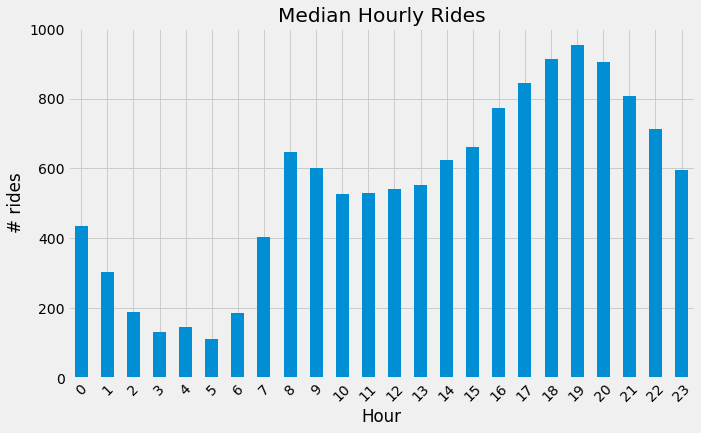

In [81]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)  # in inches
ax = hourly.plot.bar(rot=45)
ax.set_xlabel('Hour')
ax.set_title('Median Hourly Rides');
ax.set_ylabel('# rides')

# in solutions there is also a breakdown by vendors

## Box Plot per VendorID of Daily Earnings

2 boxplots, one per vendor, present daily earnings

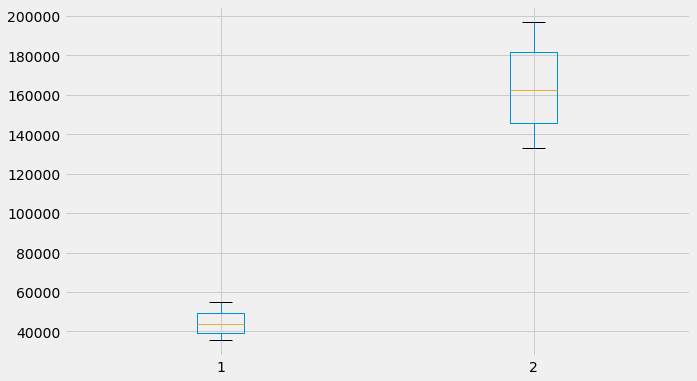

In [84]:
# we can do this by 2 group by steps, but also through PIVOT

edf = df[['VendorID', 'Total_amount', 'weekday']]
pivot_edf = edf.pivot_table(index='weekday', columns='VendorID', values='Total_amount', aggfunc=np.sum)
# create a new dataframe pivot from edf, define index as the day, columns as vendor, values as the total amount, and aggregation function indicates what to do for values that fall into same bin of column and index
pivot_edf.plot.box();